# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Sümeyra KOÇ
# Student ID: 2210765020

In [1]:
# imports
import sqlite3
import csv
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

## Table 1: Clients:
| Column      | Type  | Key        | 
|-------------|-------|------------|
|CustomerID   |INTEGER| PK         |
|CustomerName |TEXT   |            |
|CustomerEmail|INTEGER|            |
|CustomerPhone|INTEGER|            |

## Table 2: Airlines:
| Column    | Type  | Key        | 
|-----------|-------|------------|
|AirlineID  |INTEGER| PK         |
|AirlineName|TEXT   |            |
|FlightID   |INTEGER|FOREIGN KEY REFERENCE Flights|

## Table 3: Flights:
| Column           | Type   | Key        | 
|------------------|--------|------------|
|FlightID          |INTEGER | PK,FK REFERENCE Airlines|
|Flight_Departure  |TEXT    |            |
|Flight_Destination|TEXT    |            |
|Flight_Date       |DATETIME|            |

## Table 4: Hotels:
| Column      | Type  | Key | 
|-------------|-------|-----|
|HotelID      |INTEGER|PK   |
|HotelName    |TEXT   |     |
|HotelLocation|TEXT   |     |
|HotelRating  |INTEGER|     |

## Table 5: FlightBookings:
| Column         | Type   | Key                | 
|----------------|--------|--------------------|
|BookingID       |INTEGER |PK                  |
|CustomerID      |INTEGER |FK REFERENCE Clients|
|FlightID        |INTEGER |FK REFERENCE Flights|

## Table 6: HotelBookings:
| Column         | Type   | Key                | 
|----------------|--------|--------------------|
|BookingID       |INTEGER |PK                  |
|CustomerID      |INTEGER |FK REFERENCE Clients|
|HotelID         |INTEGER |FK REFERENCE Hotels |

## Table 7: FlightFeedbacks:
| Column       | Type  | Key| 
|--------------|-------|----|
|FeedbackID    |INTEGER|PK  |
|CustomerID    |INTEGER|    |
|AirlineID     |INTEGER|    |
|Review        |STRING |    |

## Table 8: HotelFeedbacks:
| Column       | Type  | Key| 
|--------------|-------|----|
|FeedbackID    |INTEGER|PK  |
|CustomerID    |INTEGER|    |
|HotelID       |INTEGER|    |
|Review        |STRING |    |

In [2]:
# embody tables that we have created abstractly above

conn = sqlite3.connect("Skyward_DataBase.db")
cursor = conn.cursor()
# create skeletons of the tables

# Clients
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Clients (
        CustomerID INTEGER PRIMARY KEY,
        CustomerName TEXT,
        CustomerEmail INTEGER,
        CustomerPhone INTEGER
    )
''')
# Airlines
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Airlines (
        AirlineID INTEGER PRIMARY KEY,
        AirlineName TEXT,
        FlightID INTEGER,
        FOREIGN KEY (FlightID) REFERENCES Flights(FlightID)
    )
''')
# Flights
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Flights (
        FlightID INTEGER PRIMARY KEY,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date DATETIME,
        FOREIGN KEY (FlightID) REFERENCES Airlines(FlightID)
    )
''')
# Hotels
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hotels (
        HotelID INTEGER PRIMARY KEY,
        HotelName TEXT,
        HotelLocation TEXT,
        HotelRating INTEGER
    )
''')
# FlightBookings
cursor.execute('''
    CREATE TABLE IF NOT EXISTS FlightBookings (
        BookingID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        FlightID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (FlightID) REFERENCES Flights(FlightID)
    )
''')
# HotelBookings
cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelBookings (
        BookingID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        HotelID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
    )
''')
# FlightFeedbacks
cursor.execute('''
    CREATE TABLE IF NOT EXISTS FlightFeedbacks (
        FeedbackID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        AirlineID INTEGER,
        Review TEXT,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (AirlineID) REFERENCES Airlines(AirlineID)
    )
''')
# HotelFeedbacks
cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelFeedbacks (
        FeedbackID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        HotelID INTEGER,
        Review TEXT,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
    )
''')

In [3]:
# import the data from csv files, to just created empty tables 
with open("BookingDetails.csv", "r", newline="") as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  
    # Clients
    for row in csv_reader:
        sql = "INSERT OR IGNORE INTO Clients (CustomerID, CustomerName, CustomerEmail,CustomerPhone) VALUES (?, ?, ?,?)"
        cursor.execute(sql, (row[1], row[2], row[3], row[4]))
    csv_file.seek(0)
    next(csv_reader) 

    # Airlines
    for row in csv_reader:
        # ommit empty cells in the corresponding column
        if row[15].strip(): # it is enoght to control the cell of just one column for make sure others are also empty cells.  
            sql = "INSERT OR IGNORE INTO Airlines (AirlineID, AirlineName, FlightID) VALUES (?, ?, ?)"
            cursor.execute(sql, (row[15], row[10], row[5]))
    csv_file.seek(0)
    next(csv_reader)

    # Flights
    for row in csv_reader:
        if row[5].strip():
            sql = "INSERT OR IGNORE INTO Flights (FlightID, Flight_Departure, Flight_Destination, Flight_Date) VALUES (?, ?, ?, ?)"
            cursor.execute(sql, (row[5], row[6], row[7], row[8]))
    csv_file.seek(0)
    next(csv_reader)

    # Hotels
    for row in csv_reader:
        if row[11].strip():
            sql = "INSERT OR IGNORE INTO Hotels (HotelID, HotelName, HotelLocation, HotelRating) VALUES (?, ?, ?, ?)"
            cursor.execute(sql, (row[11], row[12], row[13], row[14]))
    csv_file.seek(0)
    next(csv_reader)

    # FlightBookings and  HotelBookings
    for row in csv_reader:
        if row[5].strip():
            sql = "INSERT OR IGNORE INTO FlightBookings (BookingID, CustomerID,FlightID) VALUES (?, ?, ?)"
            cursor.execute(sql, (row[0], row[1],row[5]))
        else: 
            sql = "INSERT OR IGNORE INTO HotelBookings (BookingID, CustomerID,HotelID) VALUES (?, ?, ?)"
            cursor.execute(sql, (row[0], row[1],row[11]))
    csv_file.seek(0)
    next(csv_reader)
    
conn.commit()

with open("FeedbackDetails.csv", "r", newline="") as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) 
    # FlightFeedbacks and HotelFeedbacks
    for row in csv_reader:
        if row[2].strip():
            sql = "INSERT OR IGNORE INTO FlightFeedbacks (FeedbackID, CustomerID, AirlineID, Review) VALUES (?, ?, ?, ?)"
            cursor.execute(sql, (row[0], row[1], row[2], row[4]))
        else: 
            sql = "INSERT OR IGNORE INTO HotelFeedbacks (FeedbackID, CustomerID, HotelID, Review) VALUES (?, ?, ?, ?)"
            cursor.execute(sql, (row[0], row[1], row[3], row[4]))
    csv_file.seek(0)
    next(csv_reader)
    
conn.commit()

## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [4]:
query='''
SELECT hb.HotelID,h.HotelName, COUNT(*)
FROM HotelBookings hb, Hotels h
WHERE hb.HotelID == h.HotelID
GROUP BY hb.HotelID, h.HotelName
'''
cursor.execute(query)
pd.read_sql(query,conn)

,HotelID,HotelName,COUNT(*)
0,1464,Opal Motel,11
1,1513,Diamond Plaza,6
2,1610,Golden Suites,16
3,1647,Silver Villa,10
4,1919,Emerald Motel,15
5,2035,Sapphire Villa,14
6,2049,Jade Motel,5
7,2206,Jade Suites,7
8,2504,Pearl Resort,12
9,2525,Emerald Resort,9


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [5]:
query='''
SELECT c.CustomerName,c.CustomerEmail,c.CustomerPhone
FROM FlightFeedbacks ff , HotelFeedbacks hf, Clients c
WHERE ff.CustomerID == hf.CustomerID
       AND hf.CustomerID == c.CustomerID 
GROUP BY c.CustomerID
'''
cursor.execute(query)
pd.read_sql(query,conn)

,CustomerName,CustomerEmail,CustomerPhone
0,Mason Jones,mason.jones@mail.com,555-0497376
1,Olivia Miller,olivia.miller@mail.com,555-8743718
2,Mason Martinez,mason.martinez@mail.com,555-4087377
3,Emma Miller,emma.miller@mail.com,555-9672748
4,Olivia Garcia,olivia.garcia@mail.com,555-0514945
...,...,...,...
104,Ethan Davis,ethan.davis@mail.com,555-0282897
105,John Smith,john.smith@mail.com,555-4394283
106,Mia Williams,mia.williams@mail.com,555-6569856
107,Logan Williams,logan.williams@mail.com,555-2061905


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [6]:
# firstly find the average feedback rating across all hotels
query=''' SELECT HotelRating FROM Hotels'''
df = pd.read_sql_query(query, conn)
average_value = df['HotelRating'].mean()

# then find the hotels that have a feedback rating lower then the average_value that we just find. 
query='''
SELECT h.HotelName, h.HotelRating
FROM Hotels h
GROUP BY h.HotelID
HAVING h.HotelRating < ?
'''
cursor.execute(query,(average_value,))
# convert the result to dataframe to make it look nice to the eye
result = cursor.fetchall()
result_df = pd.DataFrame(result, columns=['HotelName', 'HotelRating'])
result_df

,HotelName,HotelRating
0,Opal Motel,2
1,Diamond Plaza,2
2,Sapphire Villa,2
3,Jade Motel,2
4,Pearl Resort,2
5,Emerald Resort,3
6,Golden Inn,3
7,Jade Resort,2
8,Silver Palace,2
9,Pearl Hideaway,1


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [7]:
query='''
SELECT c.CustomerName, (COUNT(DISTINCT FlightID)+COUNT(DISTINCT HotelID)) AS TotalBookings
FROM HotelBookings hb, FlightBookings fb,Clients c
WHERE hb.CustomerID == fb.CustomerID
      AND c.CustomerID == fb.CustomerID
GROUP BY c.CustomerID
HAVING COUNT(DISTINCT FlightID) > 1
        AND COUNT(DISTINCT HotelID) > 2
'''
cursor.execute(query)
pd.read_sql(query,conn)

,CustomerName,TotalBookings


We have empty table as a result of above code part, the reason is that, in the "Booking Details.csv" file there is no customer who have booked 4 and up rezervation in total. 
But with this code, we can create a table for whatever we want to learn by just changing the 1 and 2 values or by changing the > operator .
For example we can learn the flight booking count of a customer who have never booked a hotel reservation.

## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [8]:
# your code here
query='''
SELECT DISTINCT c.CustomerName, c.CustomerEmail, c.CustomerPhone
FROM Clients c
JOIN FlightFeedbacks ff ON c.CustomerID = ff.CustomerID
JOIN HotelFeedbacks hf ON c.CustomerID = hf.CustomerID
'''
cursor.execute(query)
pd.read_sql(query,conn)


,CustomerName,CustomerEmail,CustomerPhone
0,Logan Williams,logan.williams@mail.com,555-2061905
1,Mia Martinez,mia.martinez@mail.com,555-0308937
2,John Johnson,john.johnson@mail.com,555-8621989
3,Mia Smith,mia.smith@mail.com,555-2197055
4,John Johnson,john.johnson@mail.com,555-3857295
...,...,...,...
104,Liam Davis,liam.davis@mail.com,555-9816387
105,Mason Miller,mason.miller@mail.com,555-8706942
106,Liam Davis,liam.davis@mail.com,555-2949165
107,John Martinez,john.martinez@mail.com,555-1201810


# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [9]:
dataSet = pd.read_csv("titanic.csv")
dataFrame = pd.DataFrame(dataSet)
groupedData = dataFrame.groupby(["Sex","Pclass"])
groupedData["Survived"].mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


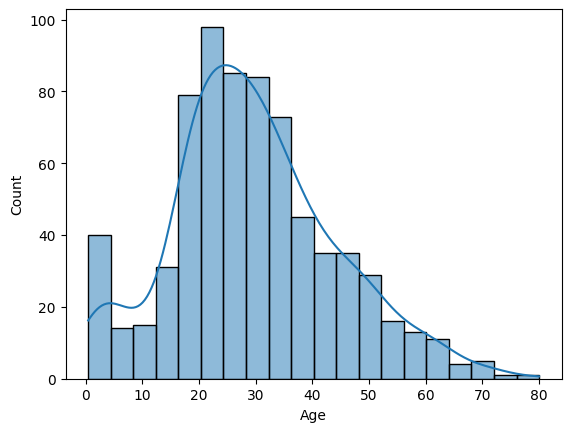

In [10]:
sns.histplot(dataFrame['Age'], kde=True)
plt.show()

According to the KDE plot, most common age group aboard the Titanic is 20-25 age range

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

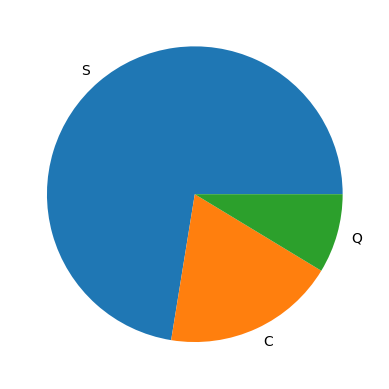

In [11]:
# Firstly illustrate the embarkation points by using a pie chart

# there are just 3 different values in Embarked colon
labels = 'S', 'C', 'Q' 

# group by data in Embarked colon
g = dataFrame.groupby("Embarked")

# shape[0] method returns the row count of grouped data frame object which is group with label "S","C" or "Q"
sizes = [g.get_group("S").shape[0],g.get_group("C").shape[0], g.get_group("Q").shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

Observation: The port with the highest boarding is S 

In [12]:
# Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?
g.get_group("S").groupby(["Sex"])["Survived"].mean()

Sex
female    0.689655
male      0.174603
Name: Survived, dtype: float64

In [13]:
# Firstly we should make two labels as Child and Adults, to show distribution of children 
labeledData_inTermsOf_age = pd.cut(dataFrame['Age'], bins=[0, 15, 80], labels=['Child','Adult'])
# Then we can see survive rate for Child and Adult separately
g.get_group("S").groupby(labeledData_inTermsOf_age,observed=True)["Survived"].mean()

Age
Child    0.566667
Adult    0.338057
Name: Survived, dtype: float64

As a result of two pivot tables we approve the distribution reflects the "women and children first" evacuation policy. 
Because femal and child rates are higher then male and adult rates

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

<Axes: xlabel='Age', ylabel='Fare'>

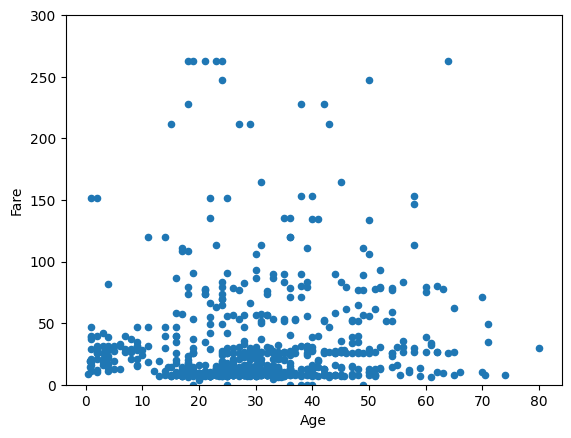

In [14]:
# According to our data, the y axis should be in range of 0-500 but in range of 300-500 there are just 2 passenger's data,
# so that we creat our scatter graph with ylim=(0,300)
dataFrame.plot.scatter(x='Age',y='Fare',ylim=(0,300))

My conclusion from scatter graph is that, in range of 0-10 age the fare is low and in this age range there is no exorbitant fare
But fare is low also when age is in range of 20-40 ages but in this age range it is possible to see exorbitant fare
But in general the fare is approximately constant, reagrdless of age range

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


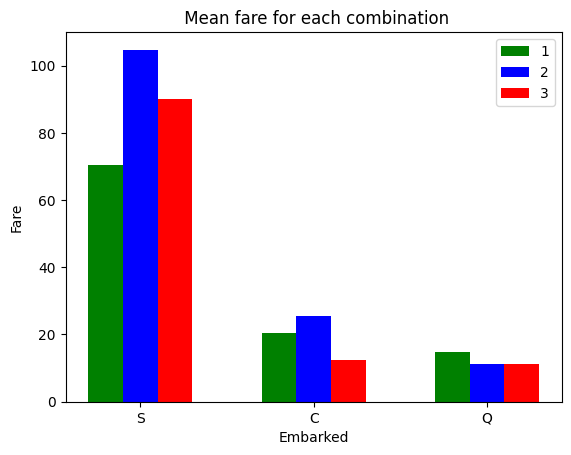

In [15]:
# data in list shape
Embarked = ["S", "C", "Q"]
Pclass = [1, 2, 3]
mean_fare=[] # will be filled this empty list in the fallowing nested for loop 

# groups the data frame according to port and class columns. In this way, we obtain a separate data frame for each port and class combination.
g = dataFrame.groupby(["Embarked","Pclass"])

# through nested for loops, we obtain all combinations of (Embarked and PClass) pair
for e in Embarked:
    for c in Pclass:
        ce_mean = g.get_group((e, c)).Fare.mean() # for each combination calculate the mean value and append to the mean_fare
        mean_fare.append(ce_mean)
        
# to determine location of bars in the x axis, we should create a range object
x = range(3)

# width of bars
width = 0.20

# form the grouped bar chart
plt.bar(x, mean_fare[:3], width, color="green", label="1") # divide the mean_fare into three sublists because we have 3 combinitons at ones.
plt.bar([i + width for i in x], mean_fare[3:6], width, color="blue", label="2") # [i + width for i in x] code part give us list of different colored bars's coordinates on x axis. 
plt.bar([i + 2*width for i in x], mean_fare[6:], width, color="red", label="3")

# add lebels to increase readabilty
plt.xlabel("Embarked")
plt.ylabel("Fare")
plt.title(" Mean fare for each combination")
plt.xticks([i + width for i in x], Embarked)
plt.legend()

plt.show()

As we can see pie chart above, the number of the passengers who use the S embarkation ports is very high for all classes, so that in the bar chart above we can see that the fare mean values for S embarkation port's all classes are also higher then all the other "fare mean values" in bar chart.

In each embarkation ports, the second class's fare mean value is more or less higher then other classes's fare mean values.

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
